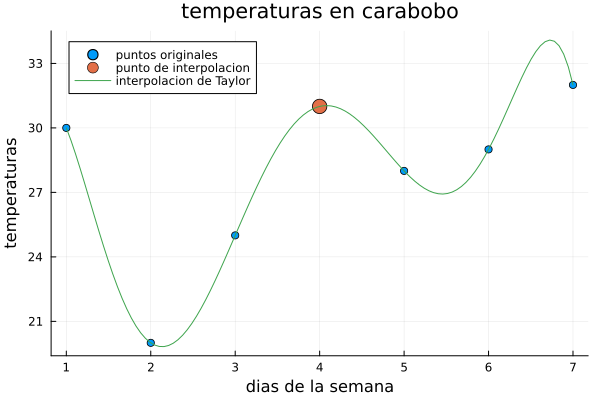

In [9]:
using PyCall
using Plots
#importamos numpy y sympy
np = pyimport("numpy")
sym=pyimport("sympy")
#definimos las listas con los datos a graficar
xi = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], dtype=np.float64)
yi = np.array([30.0, 20.0, 25.0, 31.0, 28.0, 29.0, 32.0], dtype=np.float64)
x = sym.Symbol("x")

#Definir la función que describen estos datos
polinomio = np.polyfit(xi, yi, deg=length(xi)-1)
funcion = np.poly1d(polinomio)

#funcion que calcula 6 terminos de la serie de Taylor
function interpolacion_de_taylor(funcion, valor)
    serie = 0
    funcion_derivada = funcion
    for i in 0:6
        if i == 0
            serie += np.polyval(funcion_derivada,valor) * (x - valor)^i
        else
            funcion_derivada = np.polyder(funcion_derivada)
            serie += (np.polyval(funcion_derivada, valor) * (x - valor)^i) / factorial(i)
        end
    end
    #retornamos la serie de taylor calculada que posteriormente sera graficada
    return serie
end
#asignamos lo que retorne la funcion a una variable serie que se comportara como una funcion"
serie = interpolacion_de_taylor(funcion, 4)
#=array que contiene los puntos a graficar en x de la funcion serie, dicho array tendra 110 puntos que van desde el
valor minimo de xi hasta el valor maximo de xi para una grafica mas precisa=#
datos_x = np.linspace(minimum(xi), maximum(xi), 110)
#array que sera llenado con los puntos en y de la funcion serie
datos_y = zeros(length(datos_x))

#obtenemos los puntos en Y de la funcion serie evaluando los puntos de datos_x en la funcion serie
for i in 1:length(datos_y)
    datos_y[i] = serie.subs(x, datos_x[i])
end

#datos de la grafica
scatter(xi,yi,label="puntos originales",xlabel="dias de la semana",ylabel="temperaturas",title="temperaturas en carabobo")
scatter!([4], [31], markersize=8, label="punto de interpolacion")
plot!(datos_x,datos_y,label="interpolacion de Taylor")





Valor interpolado en x = 2.5: 20.9814453125


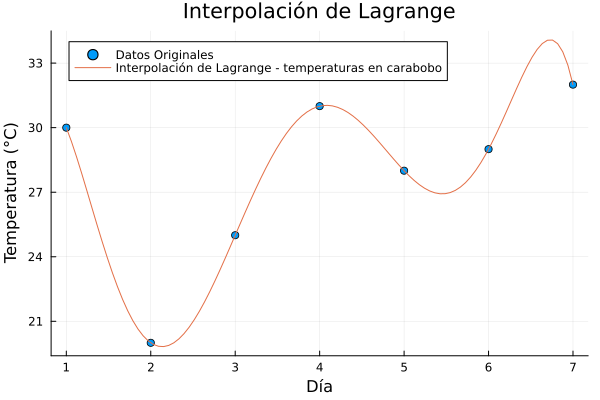

In [1]:
using Plots
using PyCall

# Definir los datos originales
xi = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]
yi = [30.0, 20.0, 25.0, 31.0, 28.0, 29.0, 32.0]

# Definir la función de interpolación de Lagrange
function lagrange_interp(x, xi, yi)
    n = length(xi)
    L = 0
    for i in 1:n
        l_i = 1
        for j in 1:n
            if j != i
                l_i *= (x - xi[j]) / (xi[i] - xi[j])
            end
        end
        L += l_i * yi[i]
    end
    return L
end

# Interpolación en x = 2.5
x_interp = 2.5
y_interp = lagrange_interp(x_interp, xi, yi)
println("Valor interpolado en x = $x_interp: $y_interp")

# Generar datos para la interpolación de Lagrange
x_range = range(minimum(xi), stop=maximum(xi), length=100)
y_range = [lagrange_interp(x, xi, yi) for x in x_range]

# Graficar los datos originales y la interpolación de Lagrange
plot(xi, yi, seriestype=:scatter, label="Datos Originales", xlabel="Día", ylabel="Temperatura (°C)",
    title="Interpolación de Lagrange", legend=:topleft, grid=true)
plot!(x_range, y_range, label="Interpolación de Lagrange - temperaturas en carabobo")

In [ ]:
#Alfredo 

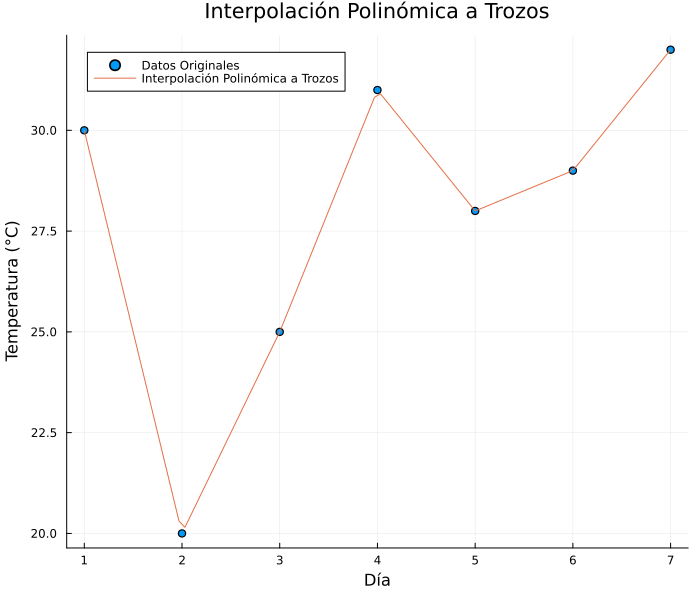

In [2]:
using Plots
using Interpolations  # Importar el paquete Interpolations

# Importar numpy y sympy
np = pyimport("numpy")
sym = pyimport("sympy")

# Definir los puntos de datos
xi = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0])
yi = np.array([30.0, 20.0, 25.0, 31.0, 28.0, 29.0, 32.0])

# Realizar la interpolación polinómica a trozos
interp_func = Interpolations.interpolate((xi,), yi, Interpolations.Gridded(Interpolations.Linear()))

# Generar valores interpolados
x_range = np.linspace(minimum(xi), maximum(xi), 100)
y_interp = [interp_func(x) for x in x_range]

# Graficar los datos originales y la interpolación polinómica a trozos
plot(xi, yi, seriestype=:scatter, label="Datos Originales",
    xlabel="Día", ylabel="Temperatura (°C)",
    title="Interpolación Polinómica a Trozos",
    legend=:topleft, grid=true,
    size=(700, 600))  # Ajustar el tamaño de la gráfica

plot!(x_range, y_interp, label="Interpolación Polinómica a Trozos")